In [2]:
import re

new_string = "I want to catch all of the numbers in this string. 1, 2, 3, 4, 5, 55"
description = "Mark graduated from high school on 04/15/2018"

result = re.findall(r"\d",new_string)
print(result)

['1', '2', '3', '4', '5', '5', '5']


In [3]:
import re

new_string = "I want to catch all of the numbers in this string. 1, 2, 3, 4, 5, 55."
description = "Mark graduated from high school on 04/15/2018"

result = re.findall(r"\d,",new_string)
print(result)

['1,', '2,', '3,', '4,', '5,']


In [4]:
import re

new_string = "I want to catch all of the numbers in this string. 1, 2, 3, 4, 5, 55"
description = "Mark graduated from high school on 04/15/2018"

result = re.findall(r"\d\d",new_string,re.IGNORECASE)
print(result)

['55']


In [11]:
import re

new_string = "I want to catch all of the numbers in this string. 1, 2, 3, 4, 5, 55"
description = "Mark graduated from high school on 04/15/2018, then on 03/04/2020 he started his first job."

result = re.findall(r"[0-9]{2}/[0-9]{2}/[0-9]{4}",description) # find 2 digits in the range 0 to 9 followed by a slash
print(result)

['04/15/2018', '03/04/2020']


In [13]:
import re

new_string = "I want to catch all of the numbers in this string. 1, 2, 3, 4, 5, 55"
description = "Mark graduated from high school on 04/15/2018, then on 3/04/2020 he started his first job."

result = re.findall(r"[0-9]{1,2}/[0-9]{2}/[0-9]{4}",description) # find 2 digits in the range 0 to 9 followed by a slash
print(result)

['04/15/2018', '3/04/2020']


In [4]:
import re

new_string = "I want to catch all of the numbers in this string. 1, 2, 3, 4, 5, 55"
description = "Mark graduated from high school on 04\\15\\2018, then on 3\\04\\2020 he started his first job."

result = re.findall(r"[0-9]{1,2}\\[0-9]{1,2}\\[0-9]{4}",description) # find 2 digits in the range 0 to 9 followed by a slash
print(result)

['04\\15\\2018', '3\\04\\2020']


In [31]:
import re

filename = "./ReferenceFiles/chapter_01.txt"
with open(filename,"r") as f:
    data  = f.read() # read as a stream
    

# result = re.findall(r"[a-z]",data) # find 2 digits in the range 0 to 9 followed by a slash
# print(result)

result = re.findall(r"[A-Z]{7} [0-9]|[a-z]{7} [0-9]{1,2}",data) # Find chapter headings either lower or uppercase
print(result)

['CHAPTER 1']


In [24]:
import re

filename = "./ReferenceFiles/syslog"
with open(filename,"r") as f:
    data  = f.read() # read as a stream
    
outfilename = "./ReferenceFiles/syslog_out"
with open(outfilename, "w") as fout:
    
    # result = re.findall(r"[a-z]",data) # find 2 digits in the range 0 to 9 followed by a slash
    # print(result)
    pattern1 = r".*bb_kvm_client\[\d+\]: Mqtt terminate command received:.*"
    pattern2 = r".*snuc-sdkvm app.py: WorkspaceStatus: Updating OSD status for terminated workspace.*"
    # pattern3 = r".*snuc-sdkvm app.py: publish_status: blackbox/sdkvm/deskvue/status/osd_sdkvm/connection.*"
    pattern4 = r".*- Received MQTT:TOPIC.*"
    pattern5 = r".*app.py: mqtt: send_message: topic.*"
    pattern6 = r".*topic=blackbox/sdkvm/deskvue/cmd/clients/terminate.*"
    pattern7 = r".*app.py: publish_status:.*"
    pattern8 = r".*\[INFO \] - Received MQTT:TOPIC -.*"
    pattern9 = r".*status is detected of workspace on.*"
    patterns = [pattern1,pattern2,pattern4,pattern5,pattern6,pattern7,pattern8,pattern9]
    expression = '|'.join(patterns)
    results = re.findall(expression,data) # Find chapter headings either lower or uppercase
    for result in results:
        fout.write(f"{result}\n")

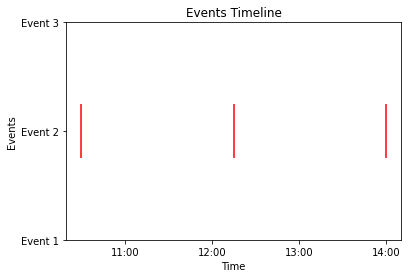

In [21]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime
import numpy as np

# Example event data
events = [
    {"time": "2023-05-10 10:30", "event": "Event 1"},
    {"time": "2023-05-10 12:15", "event": "Event 2"},
    {"time": "2023-05-10 14:00", "event": "Event 3"},
    # Add more events as needed
]

# Convert time strings to datetime objects
event_times = [datetime.strptime(event["time"], "%Y-%m-%d %H:%M") for event in events]
event_labels = [event["event"] for event in events]

y_pos = np.arange(len(events))
# Create a plot
fig, ax = plt.subplots()

# Set x-axis to display time
ax.xaxis.set_major_formatter(mdates.DateFormatter("%H:%M"))
ax.xaxis.set_major_locator(mdates.HourLocator(interval=1))

# Plot the events
ax.eventplot(event_times, lineoffsets=1, linelengths=0.5, color="red")
ax.set_ylim(0.5, 1.5)  # Adjust the y-axis limits
ax.set_yticks(y_pos)
ax.set_yticklabels(event_labels)

# Set plot title and labels
ax.set_title("Events Timeline")
ax.set_xlabel("Time")
ax.set_ylabel("Events")

# Display the plot
plt.show()


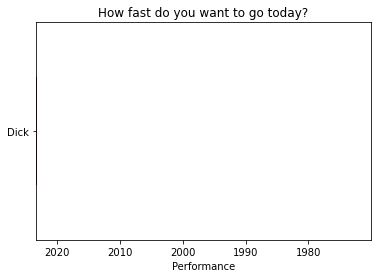

In [17]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)

# Example data
people = ('Tom', 'Dick', 'Harry', 'Slim', 'Jim')
y_pos = np.arange(len(people))
performance = .02 + 10 * np.random.rand(len(people))
error = np.random.rand(len(people))

fig, ax = plt.subplots()

#hbars = ax.barh(y_pos, performance, xerr=error, align='center')
hbars = ax.eventplot(event_times, lineoffsets=1, linelengths=0.5, color="red")
ax.set_yticks(y_pos)
ax.set_yticklabels(people)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Performance')
ax.set_title('How fast do you want to go today?')
ax.set_ylim(0.5, 1.5)  # Adjust the y-axis limits

# Label with specially formatted floats
# ax.bar_label(hbars, fmt='%.2f')
ax.set_xlim(right=15)  # adjust xlim to fit labels

plt.show()

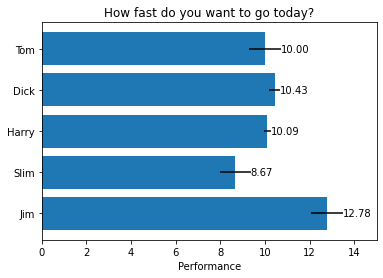

In [12]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)

# Example data
people = ('Tom', 'Dick', 'Harry', 'Slim', 'Jim')
y_pos = np.arange(len(people))
performance = 3 + 10 * np.random.rand(len(people))
error = np.random.rand(len(people))

fig, ax = plt.subplots()

hbars = ax.barh(y_pos, performance, xerr=error, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(people)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Performance')
ax.set_title('How fast do you want to go today?')

# Label with specially formatted floats
ax.bar_label(hbars, fmt='%.2f')
ax.set_xlim(right=15)  # adjust xlim to fit labels

plt.show()